In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [3]:
credito = pd.read_csv('Credit.csv')

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [6]:
credito.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
previsores = credito.iloc[:,0:20].values

In [9]:
previsores[0]

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [10]:
classe=credito.iloc[:,20].values

In [12]:
classe

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [16]:
labelencoder=LabelEncoder()
previsores[:,0]=labelencoder.fit_transform(previsores[:,0])

In [17]:
previsores[0:10]

array([[2, 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       [1, 48, "'existing paid'", 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, "'critical/other existing credit'", 'education', 2096,
        '<100', '4<=X<7', 2, "'male single'", 'none', 3, "'real estate'",
        49, 'none', 'own', 1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'no known property'",
        53, 'none', 

In [18]:
previsores[:,2]=labelencoder.fit_transform(previsores[:,2])

In [19]:
previsores[0][2]

1

In [20]:
previsores[0:5]

array([[2, 6, 1, 'radio/tv', 1169, "'no known savings'", '>=7', 4,
        "'male single'", 'none', 4, "'real estate'", 67, 'none', 'own',
        2, 'skilled', 1, 'yes', 'yes'],
       [1, 48, 3, 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, 1, 'education', 2096, '<100', '4<=X<7', 2,
        "'male single'", 'none', 3, "'real estate'", 49, 'none', 'own',
        1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, 3, 'furniture/equipment', 7882, '<100', '4<=X<7', 2,
        "'male single'", 'guarantor', 4, "'life insurance'", 45, 'none',
        "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, 2, "'new car'", 4870, '<100', '1<=X<4', 3,
        "'male single'", 'none', 4, "'no known property'", 53, 'none',
        "'for free'", 2, 'skilled', 2, 'none', 'yes']], dtype=object)

In [21]:
previsores[:,3]=labelencoder.fit_transform(previsores[:,3])
previsores[:,5]=labelencoder.fit_transform(previsores[:,5])
previsores[:,6]=labelencoder.fit_transform(previsores[:,6])
previsores[:,8]=labelencoder.fit_transform(previsores[:,8])
previsores[:,9]=labelencoder.fit_transform(previsores[:,9])
previsores[:,11]=labelencoder.fit_transform(previsores[:,11])
previsores[:,13]=labelencoder.fit_transform(previsores[:,13])
previsores[:,14]=labelencoder.fit_transform(previsores[:,14])
previsores[:,16]=labelencoder.fit_transform(previsores[:,16])
previsores[:,18]=labelencoder.fit_transform(previsores[:,18])
previsores[:,19]=labelencoder.fit_transform(previsores[:,19])


In [22]:
previsores[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

In [23]:
previsores.dtype

dtype('O')

In [24]:
X_treinamento,X_teste,y_treinamento,y_teste = train_test_split(previsores,classe,test_size=0.3,random_state=0)

In [26]:
len(X_teste)

300

In [28]:
len(y_teste)

300

In [29]:
len(X_treinamento)

700

In [30]:
len(y_treinamento)

700

In [31]:
X_treinamento[0]

array([1, 24, 1, 6, 11938, 3, 0, 2, 3, 0, 3, 3, 39, 1, 1, 2, 0, 2, 1, 1],
      dtype=object)

In [33]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_treinamento,y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
previsoes = naive_bayes.predict(X_teste)

In [35]:
len(previsoes)

300

In [40]:
previsoes[0:5]

array(['bad', 'good', 'good', 'good', 'bad'], dtype='<U4')

In [41]:
y_teste[0:5]

array(['good', 'good', 'good', 'good', 'good'], dtype=object)

In [43]:
confusao = confusion_matrix(y_teste,previsoes)

In [44]:
confusao

array([[ 41,  45],
       [ 42, 172]])

In [45]:
taxa_acerto=accuracy_score(y_teste,previsoes)

In [46]:
taxa_acerto 

0.71

In [47]:
# Tivemos um 71% de acerto com esse algoritmo

In [48]:
taxa_erro=1-taxa_acerto

In [49]:
taxa_erro

0.29000000000000004

In [50]:
# Tivemos um 29% de erro

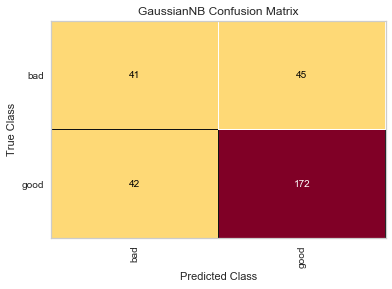

In [56]:
v=ConfusionMatrix(GaussianNB())
v.fit(X_treinamento,y_treinamento)
v.score(X_teste,y_teste)
v.poof()

In [58]:
# Simulando o modelo em produção
novo_credito=pd.read_csv('NovoCredit.csv')

In [59]:
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [60]:
novo_credito=novo_credito.iloc[:,0:20].values

In [61]:
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [62]:
novo_credito[:,0]=labelencoder.fit_transform(novo_credito[:,0])
novo_credito[:,2]=labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3]=labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5]=labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6]=labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8]=labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9]=labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11]=labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13]=labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14]=labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16]=labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18]=labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19]=labelencoder.fit_transform(novo_credito[:,19])

In [63]:
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [64]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')